#### Demand Forecasting for Inventory Management Using ARIMA

To accurately forecast the future demand for products in a warehouse using the ARIMA model, enabling optimal inventory management and reducing costs associated with overstocking and stockouts.

In [2]:
# spare cell to install packages
%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 640.0 kB/s eta 0:00:16
   ---------------------------------------- 0.0/9.8 MB 640.0 kB/s eta 0:00:16
   ---------------------------------------- 0.1/9.8 MB 290.5 kB/s eta 0:00:34
   ---------------------------------------- 0.1/9.8 MB 353.1 kB/s eta 0:00:28
   ---------------------------------------- 0.1/9.8 MB 392.2 kB/s eta 0:00:25
    --------------------------------------- 0.1/9.8 MB 423.5 kB/s eta 0:00:23
    --------------------------------------- 0.2/9.8 MB 437.1 kB/s eta 0:00:23
    --------------------------------------- 0.2/9.8 MB 497.6 kB/s eta 0:00:20
    --------------------------------------- 0.2/9.8 MB 485.3 kB/s eta 0:00:20
   - -------------------------------------- 0.2/9.8 MB 519.9 kB/s eta 0:00:19
   - -------------------------------------- 0.3/9.8 MB 512.0 kB/s eta 0:00:19
   -


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# import necessary libraries

import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt

In [4]:
# sample data - synthetic time series dataset representing the monthly sales of a product over a few years

np.random.seed(42)

date_range = pd.date_range(start='2018-01-01', end='2023-12-31', freq='M')
sales = np.random.poisson(lam=200, size=len(date_range)) + np.arange(len(date_range)) * 5

# create a DataFrame
data = pd.DataFrame({'Date': date_range, 'Sales': sales})
data.set_index('Date', inplace=True)

data.head()

C:\Users\mohana.selvakumar\AppData\Local\Temp\ipykernel_21888\3646042764.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2018-01-01', end='2023-12-31', freq='M')


,Sales
Date,
2018-01-31,195
2018-02-28,215
2018-03-31,194
2018-04-30,219
2018-05-31,236


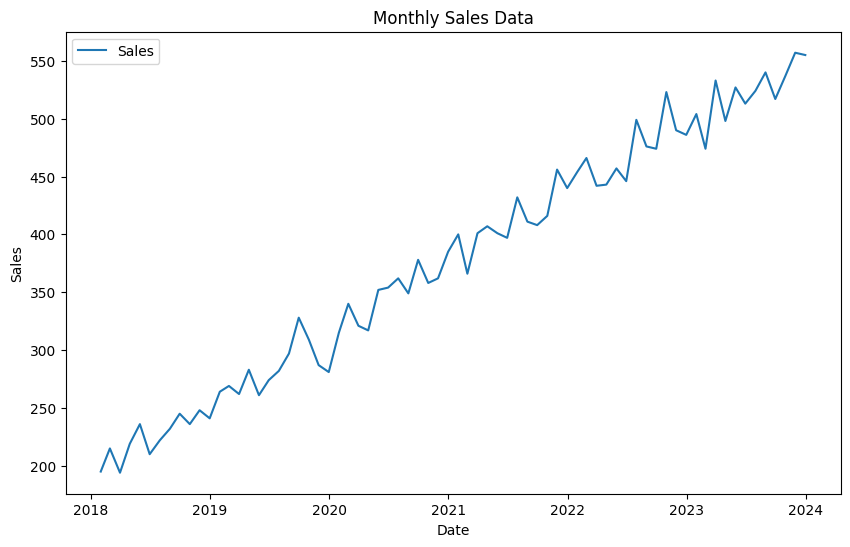

In [5]:
# plot the time series

plt.figure(figsize=(10, 6))
plt.plot(data, label='Sales')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [6]:
# check for stationarity using the Augmented Dickey-Fuller (ADF) test

'''
The Augmented Dickey-Fuller test is a statistical test used to check whether a time series is stationary. 
Stationarity means that the statistical properties of the series, such as mean and variance, do not change over time. 
Most time series models, including ARIMA, assume that the series is stationary.
'''
result = adfuller(data['Sales'])

'''
ADF Statistic: A more negative value indicates stronger evidence against the presence of a unit root 
(i.e., stronger evidence that the series is stationary).

p-value: A lower p-value (< 0.05) indicates that you can reject the null hypothesis, suggesting 
that the series is stationary.
'''
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# if not stationary, difference it
# differencing is a method where you subtract the previous observation from the current observation
data_diff = data.diff().dropna()


ADF Statistic: -0.8286347164158788
p-value: 0.8105658106632768


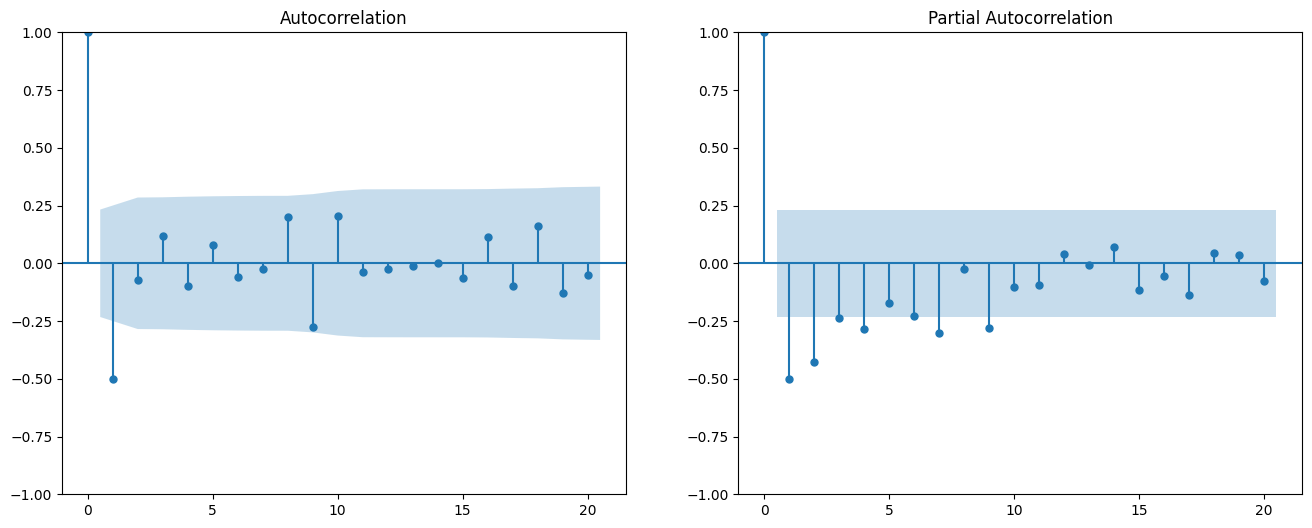

In [7]:
# plot ACF and PACF

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(data_diff, ax=ax1, lags=20)
plot_pacf(data_diff, ax=ax2, lags=20)

plt.show()


In [8]:
# arima model

model = ARIMA(data, order=(1, 1, 1))  # adjust p, d, q based on ACF and PACF
model_fit = model.fit()

print(model_fit.summary())

c:\Users\mohana.selvakumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\mohana.selvakumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\mohana.selvakumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -312.989
Date:                Thu, 25 Jul 2024   AIC                            631.979
Time:                        12:54:09   BIC                            638.767
Sample:                    01-31-2018   HQIC                           634.678
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1976      0.294     -0.671      0.502      -0.775       0.380
ma.L1         -0.3042      0.321     -0.948      0.343      -0.933       0.325
sigma2       393.5032     67.795      5.804      0.0

In [9]:
# forecasts

forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
conf_int = forecast.conf_int()

C:\Users\mohana.selvakumar\AppData\Local\Temp\ipykernel_21888\409101723.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')[1:]


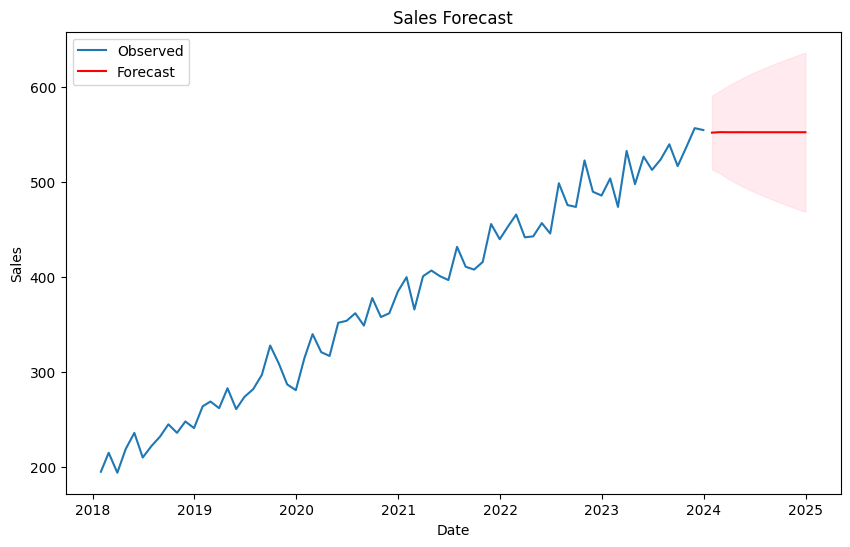

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [11]:
# split into train and test sets

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [13]:
# training arima model

model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()


c:\Users\mohana.selvakumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\mohana.selvakumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\mohana.selvakumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [14]:
# make predictions on test set

forecast = model_fit.forecast(steps=len(test))

In [15]:
# evaluate the model

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)

print('MAE:', mae)
print('MSE:', mse)

MAE: 43.3599479003639
MSE: 2428.715258813378
